
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [43]:
student_number = "400104801"
Name = "Mehran"
Last_Name = "Bakhtiari"

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [44]:
import numpy as np


def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    X = np.linspace(range_start, range_end, num_samples)
    y = 0.1 * X ** 6 - 2 * X ** 3 + 7 * X ** 2 - 9 * X + 3
    noise = np.random.normal(0, noise_std, num_samples)
    y += noise
    return X, y


X, y = generate_dataset(-3, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.2)
X_test_out_of_range, y_test_out_of_range = generate_dataset(4, 6, 200)

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [46]:
class PolynomialRegression:
    def __init__(self, degree, learning_rate=0.01, iterations=1000, gradient_clip=0.5):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.gradient_clip = gradient_clip

    def fit(self, X, y):
        self.X_poly = self._poly_features(X)
        self.theta = np.zeros(self.X_poly.shape[1])
        for _ in range(self.iterations):
            gradients = 2 / len(X) * self.X_poly.T.dot(self.X_poly.dot(self.theta) - y)
            gradients = np.clip(gradients, -self.gradient_clip, self.gradient_clip)
            self.theta -= self.learning_rate * gradients
        return self

    def predict(self, X):
        X_poly = self._poly_features(X)
        return X_poly.dot(self.theta)

    def _poly_features(self, X):
        X_poly = np.ones((X.shape[0], 1))
        for i in range(1, self.degree + 1):
            X_poly = np.hstack((X_poly, X.reshape(-1, 1) ** i))
        return X_poly

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [47]:
from sklearn.metrics import mean_squared_error


def evaluate_models(models, X_test, y_test):
    mse_scores = []
    for model in models:
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        mse_scores.append(mse)
    return mse_scores

## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

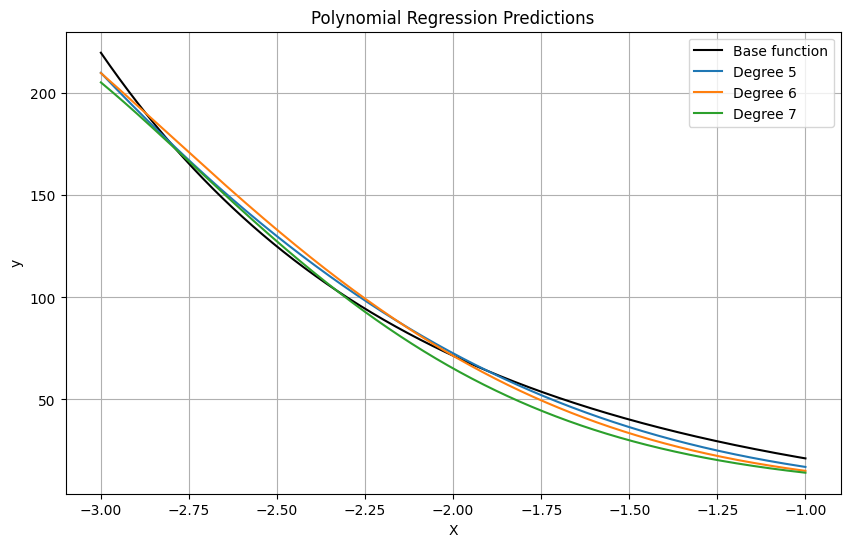

In [48]:
import matplotlib.pyplot as plt


models = []
for degree in range(2, 13):
    model = PolynomialRegression(degree)
    model.fit(X_train, y_train)
    models.append(model)

mse_scores_test_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
mse_scores_test_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

X_base = np.linspace(-3, -1, 1000)
y_base = 0.1 * X_base**6 - 2 * X_base**3 + 7 * X_base**2 - 9 * X_base + 3

plt.figure(figsize=(10, 6))
plt.plot(X_base, y_base, label='Base function', color='black')

for degree in [5, 6, 7]:
    model = models[degree - 2]
    y_pred = model.predict(X_base)
    plt.plot(X_base, y_pred, label=f'Degree {degree}')

plt.legend()
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Predictions')
plt.show()

## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

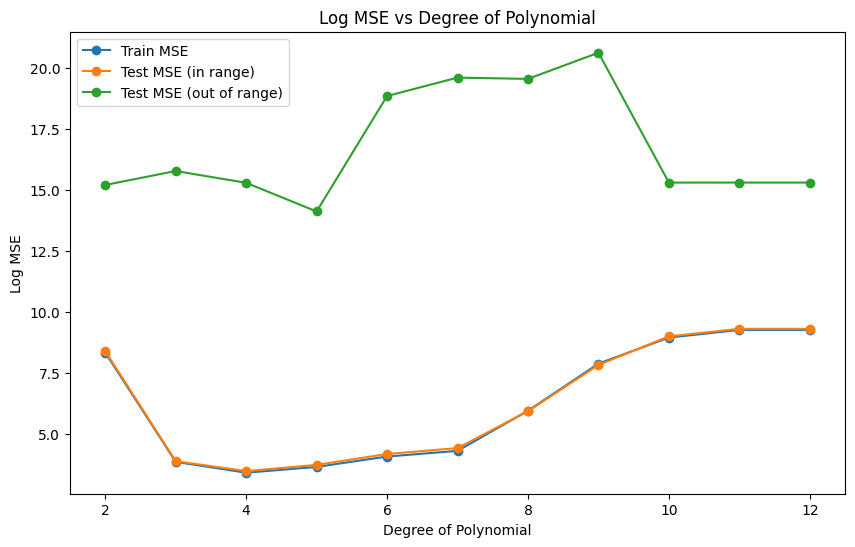

In [49]:
train_mse_scores = evaluate_models(models, X_train, y_train)

plt.figure(figsize=(10, 6))
degrees = list(range(2, 13))
plt.plot(degrees, np.log(train_mse_scores), label='Train MSE', marker='o')
plt.plot(degrees, np.log(mse_scores_test_in_range), label='Test MSE (in range)', marker='o')
plt.plot(degrees, np.log(mse_scores_test_out_of_range), label='Test MSE (out of range)', marker='o')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Log MSE')
plt.title('Log MSE vs Degree of Polynomial')
plt.legend()
plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?

Analyzing the plots, particularly the MSE vs. polynomial degree, we can conclude:

Bias-Variance Tradeoff: Lower-degree polynomials have high bias but low variance, which leads to underfitting. Higher-degree polynomials have low bias but high variance, which leads to overfitting.

Optimal Degree: There is an optimal degree where the model generalizes best to unseen data. Beyond this degree, increasing complexity harms performance on test data due to overfitting.

By comparing the train and test MSE across polynomial degrees, we can identify the balance point where the model achieves a good tradeoff between bias and variance.